# Get started with Google's Gemini API

## In this notebook, I will show you how to use Gemini API, and now I will show you how to :
1. Generate text responses from image
2. Generate text responses from text 
3. Use Gemini for multi-turn conversations (chat).
4. Embbeddings


In [3]:
import PIL.Image 
import matplotlib.pyplot as plt
import google.generativeai as genai
 
from IPython.display import display
from IPython.display import Markdown

import pathlib
import textwrap
from kaggle_secrets import UserSecretsClient

In [4]:
user_secrets = UserSecretsClient()
GeminiKey = user_secrets.get_secret("Gemini API")

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [5]:
genai.configure(api_key = GeminiKey)

### In Gemini Model , we can use different model base on what you want
#### In this notebook , i will use gemini-1.5-

In [6]:
for model in genai.list_models():
    if 'generateContent' in model.supported_generation_methods:
        print(model.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash


## Generate text from text image

In [7]:
model = genai.GenerativeModel('gemini-1.5-flash')

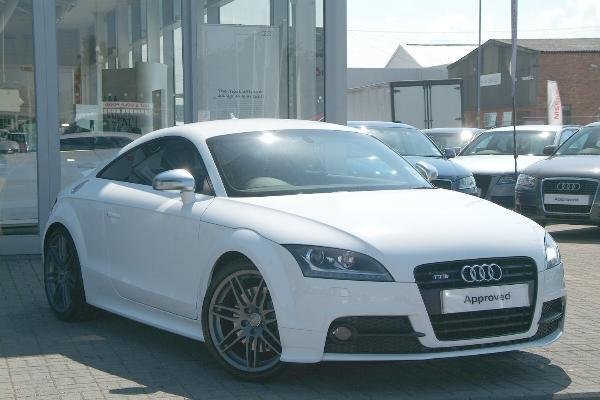

In [8]:
image = PIL.Image.open('/kaggle/input/stanford-cars-dataset/cars_train/cars_train/00001.jpg')
image

In [9]:
response = model.generate_content(image)

to_markdown(response.text)

> This is a beautiful white Audi TT RS. It is parked in front of a building with large glass windows. The car is very clean and shiny. The wheels are black and the car has a black grille. The car is surrounded by other cars, but it is the most prominent in the picture.

In [10]:
response = model.generate_content(["Can you tell me the make of the car?", image])
to_markdown(response.text)

> Audi.

#### The Gemini API supports multimodal inputs that combine text with media files. The following example shows how to generate text from text-and-image input:

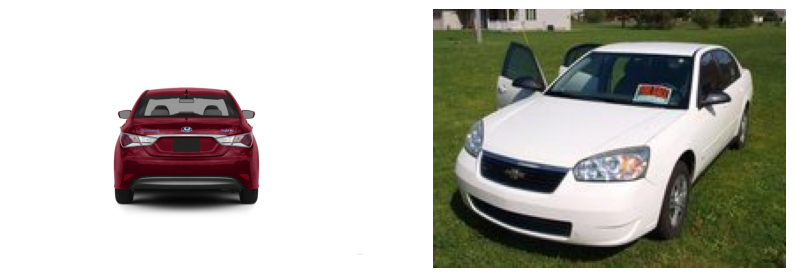

In [11]:
def show_images_side_by_side_pil(image_path1, image_path2):
    # Memuat gambar menggunakan PIL
    image1 = PIL.Image.open(image_path1)
    image2 = PIL.Image.open(image_path2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image1)
    axes[0].axis('off')  

    # Menampilkan gambar kedua
    axes[1].imshow(image2)
    axes[1].axis('off')  

    plt.show()

show_images_side_by_side_pil('/kaggle/input/stanford-cars-dataset/cars_train/cars_train/00004.jpg', '/kaggle/input/stanford-cars-dataset/cars_train/cars_train/00018.jpg')

In [12]:
image1 = {
    'mime_type': 'image/jpeg',
    'data': pathlib.Path('/kaggle/input/stanford-cars-dataset/cars_train/cars_train/00004.jpg').read_bytes()
}

image2 = {
    'mime_type': 'image/jpeg',
    'data': pathlib.Path('/kaggle/input/stanford-cars-dataset/cars_train/cars_train/00018.jpg').read_bytes()
}

prompt = "What's different between these pictures?"

response = model.generate_content([prompt, image1, image2])
print(response.text)

The first picture is of a Hyundai Sonata Hybrid, the second picture is of a Chevrolet Malibu. The cars are different makes and models, the first car is red and the second car is white, the first car is facing the rear and the second car is facing the front.


## Generate Text Response From Input
#### The Gemini model also allows you to respond to text you enter. Also enables you to have freeform conversations across multiple turns

In [13]:
response = model.generate_content("What is Black Hole")

to_markdown(response.text)

> ## Black Hole: A Cosmic Mystery
> 
> A black hole is a region of spacetime where gravity is so strong that nothing, not even light, can escape. It's formed when a massive star collapses at the end of its life, compressing its mass into an incredibly small space.
> 
> **Key Features:**
> 
> * **Singularity:** At the heart of a black hole lies a singularity, a point of infinite density where all the mass is concentrated. 
> * **Event Horizon:** This is the boundary around the singularity where escape velocity reaches the speed of light. Anything that crosses this point can't return. 
> * **Strong Gravity:** The immense gravity of a black hole warps spacetime around it, bending light paths and causing time to slow down. 
> 
> **Types of Black Holes:**
> 
> * **Stellar Black Holes:** Formed from the collapse of massive stars, typically 3 to 10 times the mass of our Sun.
> * **Supermassive Black Holes:** Found at the centers of galaxies, millions or even billions of times more massive than the Sun.
> * **Intermediate-Mass Black Holes:**  Have masses between stellar and supermassive black holes.
> 
> **Why are Black Holes Important?**
> 
> * **Understanding Gravity:** Black holes offer a unique laboratory to study the nature of gravity in extreme conditions. 
> * **Galaxy Formation:** Supermassive black holes play a crucial role in galaxy formation and evolution.
> * **Cosmic Phenomena:** They power some of the most energetic and luminous events in the universe, such as quasars and active galactic nuclei.
> 
> **Despite being invisible, black holes are not merely theoretical objects.** Scientists have observed their effects on surrounding matter and even captured their 'shadows' using radio telescopes. 
> 
> **Black holes remain a fascinating area of research, offering insights into the mysteries of gravity, space, and time.** 


In [14]:
response.candidates

[content {
  parts {
    text: "## Black Hole: A Cosmic Mystery\n\nA black hole is a region of spacetime where gravity is so strong that nothing, not even light, can escape. It\'s formed when a massive star collapses at the end of its life, compressing its mass into an incredibly small space.\n\n**Key Features:**\n\n* **Singularity:** At the heart of a black hole lies a singularity, a point of infinite density where all the mass is concentrated. \n* **Event Horizon:** This is the boundary around the singularity where escape velocity reaches the speed of light. Anything that crosses this point can\'t return. \n* **Strong Gravity:** The immense gravity of a black hole warps spacetime around it, bending light paths and causing time to slow down. \n\n**Types of Black Holes:**\n\n* **Stellar Black Holes:** Formed from the collapse of massive stars, typically 3 to 10 times the mass of our Sun.\n* **Supermassive Black Holes:** Found at the centers of galaxies, millions or even billions of tim

## Chat Conversation
#### Gemini allows you to keep a history of multiple conversations you have had.. The ChatSession class simplifies the process by managing the state of the conversation, so unlike with generate_content, you do not have to store the conversation history as a list.



In [15]:
chat = model.start_chat(history=[])

chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [16]:
response = chat.send_message("If humans could travel outside the Milky Way galaxy, how long would it take using the fastest means of transportation ever created by humans?")

to_markdown(response.text)

> It's impossible to give a definitive answer to how long it would take to travel outside the Milky Way galaxy using the fastest means of transportation ever created by humans, because:
> 
> * **The Milky Way is HUGE:**  It spans about 100,000 light-years across. That means even traveling at the speed of light, it would take 100,000 years to cross it!
> * **Our fastest spacecraft are incredibly slow compared to light:** The fastest human-made object, the Parker Solar Probe,  reaches speeds of about 430,000 miles per hour. This is incredibly fast, but still only a fraction of the speed of light.
> * **We don't have the technology to travel at even close to the speed of light:**  Even reaching a significant fraction of the speed of light would require technologies that we haven't even begun to develop.
> 
> **Hypothetical Scenarios:**
> 
> * **If we could travel at the speed of light:** It would still take tens of thousands of years to reach the edge of the Milky Way, and then countless more years to travel beyond it.
> * **If we could reach a significant fraction of the speed of light:** We could potentially cut down on the travel time, but even then, it would likely take thousands of years to escape the galaxy.
> 
> **The reality is that interstellar travel, let alone intergalactic travel, is currently beyond our technological capabilities.**  
> 
> **It's important to remember:** Even if we could travel at the speed of light, the immense distances involved in space travel mean that it would be a journey lasting many lifetimes. 


In [17]:
response = chat.send_message("if it is not possible. Do you think humans can make a vehicle that is close to light?")

to_markdown(response.text)

> You're right to be skeptical about reaching the speed of light. It's a huge challenge, and there are fundamental physical limits we need to consider:
> 
> **1. The Energy Barrier:** Accelerating anything to the speed of light requires an unimaginable amount of energy.  Think of it this way: the faster an object goes, the more energy it needs to go even faster. As you approach the speed of light, the energy requirements become astronomical, essentially requiring infinite energy. 
> 
> **2. Einstein's Relativity:** Einstein's theory of relativity dictates that nothing with mass can actually reach the speed of light.  As an object approaches the speed of light, its mass increases infinitely, making it impossible to accelerate further. 
> 
> **3. Time Dilation:** Even if we could reach near light speed, time would start to slow down for the travelers relative to those on Earth. This means that even though they might feel like they've traveled a shorter amount of time, a lot more time would have passed on Earth. 
> 
> **So, can we get close to the speed of light?**  Maybe. But it's a monumental challenge with huge technological hurdles:
> 
> * **New Propulsion Systems:** We need to develop propulsion systems that are far more efficient than anything we have today.  This could involve harnessing exotic energy sources, like fusion energy, or finding entirely new ways to manipulate spacetime.
> * **Materials Science:**  We'd need materials that can withstand the immense stresses and temperatures associated with traveling at near-light speed.  
> * **Understanding the Universe:**  We still have much to learn about the nature of space and time.  Understanding these fundamental concepts is crucial for developing technologies that can push us closer to the speed of light.
> 
> **While reaching the speed of light seems impossible now, it's crucial to remember that our understanding of physics and technology is constantly evolving.**  It's impossible to say for sure what the future holds. Perhaps one day, with advances in science and engineering, we might find ways to overcome these obstacles. 


In [18]:
chat.history

[parts {
   text: "If humans could travel outside the Milky Way galaxy, how long would it take using the fastest means of transportation ever created by humans?"
 }
 role: "user",
 parts {
   text: "It\'s impossible to give a definitive answer to how long it would take to travel outside the Milky Way galaxy using the fastest means of transportation ever created by humans, because:\n\n* **The Milky Way is HUGE:**  It spans about 100,000 light-years across. That means even traveling at the speed of light, it would take 100,000 years to cross it!\n* **Our fastest spacecraft are incredibly slow compared to light:** The fastest human-made object, the Parker Solar Probe,  reaches speeds of about 430,000 miles per hour. This is incredibly fast, but still only a fraction of the speed of light.\n* **We don\'t have the technology to travel at even close to the speed of light:**  Even reaching a significant fraction of the speed of light would require technologies that we haven\'t even begun to d

In [19]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: If humans could travel outside the Milky Way galaxy, how long would it take using the fastest means of transportation ever created by humans?

> **model**: It's impossible to give a definitive answer to how long it would take to travel outside the Milky Way galaxy using the fastest means of transportation ever created by humans, because:
> 
> * **The Milky Way is HUGE:**  It spans about 100,000 light-years across. That means even traveling at the speed of light, it would take 100,000 years to cross it!
> * **Our fastest spacecraft are incredibly slow compared to light:** The fastest human-made object, the Parker Solar Probe,  reaches speeds of about 430,000 miles per hour. This is incredibly fast, but still only a fraction of the speed of light.
> * **We don't have the technology to travel at even close to the speed of light:**  Even reaching a significant fraction of the speed of light would require technologies that we haven't even begun to develop.
> 
> **Hypothetical Scenarios:**
> 
> * **If we could travel at the speed of light:** It would still take tens of thousands of years to reach the edge of the Milky Way, and then countless more years to travel beyond it.
> * **If we could reach a significant fraction of the speed of light:** We could potentially cut down on the travel time, but even then, it would likely take thousands of years to escape the galaxy.
> 
> **The reality is that interstellar travel, let alone intergalactic travel, is currently beyond our technological capabilities.**  
> 
> **It's important to remember:** Even if we could travel at the speed of light, the immense distances involved in space travel mean that it would be a journey lasting many lifetimes. 


> **user**: if it is not possible. Do you think humans can make a vehicle that is close to light?

> **model**: You're right to be skeptical about reaching the speed of light. It's a huge challenge, and there are fundamental physical limits we need to consider:
> 
> **1. The Energy Barrier:** Accelerating anything to the speed of light requires an unimaginable amount of energy.  Think of it this way: the faster an object goes, the more energy it needs to go even faster. As you approach the speed of light, the energy requirements become astronomical, essentially requiring infinite energy. 
> 
> **2. Einstein's Relativity:** Einstein's theory of relativity dictates that nothing with mass can actually reach the speed of light.  As an object approaches the speed of light, its mass increases infinitely, making it impossible to accelerate further. 
> 
> **3. Time Dilation:** Even if we could reach near light speed, time would start to slow down for the travelers relative to those on Earth. This means that even though they might feel like they've traveled a shorter amount of time, a lot more time would have passed on Earth. 
> 
> **So, can we get close to the speed of light?**  Maybe. But it's a monumental challenge with huge technological hurdles:
> 
> * **New Propulsion Systems:** We need to develop propulsion systems that are far more efficient than anything we have today.  This could involve harnessing exotic energy sources, like fusion energy, or finding entirely new ways to manipulate spacetime.
> * **Materials Science:**  We'd need materials that can withstand the immense stresses and temperatures associated with traveling at near-light speed.  
> * **Understanding the Universe:**  We still have much to learn about the nature of space and time.  Understanding these fundamental concepts is crucial for developing technologies that can push us closer to the speed of light.
> 
> **While reaching the speed of light seems impossible now, it's crucial to remember that our understanding of physics and technology is constantly evolving.**  It's impossible to say for sure what the future holds. Perhaps one day, with advances in science and engineering, we might find ways to overcome these obstacles. 


#### Large language models have a context window, with its length often measured by the number of tokens. Using the Gemini API, you can find out the number of tokens in any glm.Content object. For a basic example, you can pass a query string to the GenerativeModel.count_tokens or  you can check token_count for your ChatSession

In [20]:
model.count_tokens(chat.history)

total_tokens: 820

## Embeddings

#### What are embeddings?
#### Text embeddings are an NLP technique that converts text into numerical vectors, which can be plotted in an n-dimensional space. This method allows you to treat text as relational data, enabling the training of models. Embeddings capture semantic meaning and context, resulting in similar texts having closer embeddings. For instance, the sentences "I took my dog to the vet" and "I took my cat to the vet" would have close embeddings in the vector space since they describe a similar context. You can use embeddings to compare different texts and understand their relationships. For example, if the embeddings of the words "cat" and "dog" are close, you can infer that these words are similar in meaning or context, or both. This capability enables various use cases, as described in the next section.

#### The embedding service in the Gemini API creates advanced embeddings for words, phrases, and sentences. These embeddings can be utilized for various natural language processing (NLP) tasks, including semantic search, text classification, and clustering, among others.

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

In [21]:
result = genai.embed_content(
    model="models/embedding-001",
    content="what formula successfully predicted black holes ?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[0.003924897, -0.06694947, -0.024119223, 0.0132012 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [22]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'what formula successfully predicted black holes ?',
      'when can humans go to mars?',
      'How does the human body work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0053256988, -0.047997553, -0.025808731, 0.02301 ... TRIMMED ...
[0.035686057, -0.0005172647, -0.040887892, 0.01137 ... TRIMMED ...
[0.014063123, 0.0023626392, -0.011790107, 0.029632 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like `GenerativeModel.generate_content`). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [23]:
response.candidates[0].content

parts {
  text: "You\'re right to be skeptical about reaching the speed of light. It\'s a huge challenge, and there are fundamental physical limits we need to consider:\n\n**1. The Energy Barrier:** Accelerating anything to the speed of light requires an unimaginable amount of energy.  Think of it this way: the faster an object goes, the more energy it needs to go even faster. As you approach the speed of light, the energy requirements become astronomical, essentially requiring infinite energy. \n\n**2. Einstein\'s Relativity:** Einstein\'s theory of relativity dictates that nothing with mass can actually reach the speed of light.  As an object approaches the speed of light, its mass increases infinitely, making it impossible to accelerate further. \n\n**3. Time Dilation:** Even if we could reach near light speed, time would start to slow down for the travelers relative to those on Earth. This means that even though they might feel like they\'ve traveled a shorter amount of time, a lot

In [24]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '...TRIMMED')

[0.023409696, -0.03732289, -0.040279906, 0.0065446 ...TRIMMED


In [25]:
chat.history 


[parts {
   text: "If humans could travel outside the Milky Way galaxy, how long would it take using the fastest means of transportation ever created by humans?"
 }
 role: "user",
 parts {
   text: "It\'s impossible to give a definitive answer to how long it would take to travel outside the Milky Way galaxy using the fastest means of transportation ever created by humans, because:\n\n* **The Milky Way is HUGE:**  It spans about 100,000 light-years across. That means even traveling at the speed of light, it would take 100,000 years to cross it!\n* **Our fastest spacecraft are incredibly slow compared to light:** The fastest human-made object, the Parker Solar Probe,  reaches speeds of about 430,000 miles per hour. This is incredibly fast, but still only a fraction of the speed of light.\n* **We don\'t have the technology to travel at even close to the speed of light:**  Even reaching a significant fraction of the speed of light would require technologies that we haven\'t even begun to d

In [26]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[0.04625143, -0.041842766, -0.0380212, 0.01788742, ... TRIMMED...
[0.035154153, -0.05166825, -0.05508994, 0.02071989 ... TRIMMED...
[-0.015834466, -0.014282249, -0.050338607, -0.0316 ... TRIMMED...
[0.023409696, -0.03732289, -0.040279906, 0.0065446 ... TRIMMED...


### Multi-turn conversations ###
While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around `GenerativeModel.generate_content`. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [27]:
model = genai.GenerativeModel('gemini-1.5-flash')

messages = [
    {'role':'user',
     'parts': ["explain about mechanical quantum to a lecturer."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> ## Mechanical Quantum for a Lecturer: A Brief Overview
> 
> **Mechanical quantum**, while not a standard term in physics, can be interpreted in two ways:
> 
> **1. Quantum Mechanics Applied to Mechanical Systems:** This is the more likely interpretation, and it essentially involves applying the principles of quantum mechanics to systems that exhibit mechanical behavior.  This could encompass a broad range of topics, including:
> 
> * **Quantum Oscillators:**  Analyzing the behavior of harmonic oscillators (e.g., springs) at the quantum level, leading to quantized energy levels and zero-point energy.
> * **Quantum Rotors:** Studying the rotation of molecules and other rigid bodies using quantum mechanics, leading to predictions for rotational spectra and angular momentum quantization.
> * **Quantum Fluids:** Investigating the behavior of superfluids and Bose-Einstein condensates, where quantum effects become macroscopic.
> * **Quantum Transport:**  Analyzing the flow of electrons in nanostructures and other small systems, where quantum effects like tunneling and interference play a significant role.
> * **Quantum Thermodynamics:** Exploring the implications of quantum mechanics on thermodynamic processes, such as heat engines operating at the quantum level.
> 
> **2. Quantum Mechanics of Mechanical Systems:** This interpretation could focus on the fundamental quantum nature of mechanical systems themselves.  This would involve examining the quantum properties of:
> 
> * **Particles and their Wave-Particle Duality:**  Exploring the wave-like nature of particles, leading to concepts like the Heisenberg uncertainty principle and the wavefunction.
> * **Quantum Fields:**  Understanding the quantum nature of fields like electromagnetic fields and their interaction with particles, leading to concepts like photons and virtual particles.
> * **Quantum Gravity:**  Investigating the fundamental nature of gravity at the quantum level, leading to ongoing research in areas like string theory and loop quantum gravity.
> 
> **Key Concepts:**
> 
> * **Quantization:**  Energy, momentum, and other physical quantities are quantized, meaning they can only take on discrete values.
> * **Wave-Particle Duality:** Particles exhibit both wave-like and particle-like properties.
> * **Superposition:**  A quantum system can exist in a superposition of multiple states simultaneously.
> * **Entanglement:**  Two or more quantum systems can be entangled, meaning their fates are correlated even when physically separated.
> 
> **Importance:**
> 
> Mechanical quantum is crucial for understanding the behavior of matter at the atomic and subatomic level, and it has profound implications for:
> 
> * **Modern Technology:**  Quantum effects are essential for technologies like lasers, transistors, and magnetic resonance imaging (MRI).
> * **Material Science:** Understanding the quantum behavior of materials allows us to design new materials with specific properties.
> * **Fundamental Physics:** Quantum mechanics provides the framework for understanding the fundamental laws of nature.
> 
> **Further Exploration:**
> 
> * **Quantum Mechanics Textbooks:**  There are many excellent textbooks on quantum mechanics that can provide a comprehensive understanding of the subject.
> * **Research Papers:**  The latest advances in mechanical quantum are being published in research journals.
> * **Conferences and Workshops:**  Conferences and workshops are held regularly to discuss the latest developments in quantum mechanics and its applications.
> 
> It is essential to note that the term "mechanical quantum" is not commonly used. However, understanding the application of quantum mechanics to mechanical systems is crucial in various fields, offering insights into the fundamental nature of matter and enabling cutting-edge technologies.


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [28]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about explanation to a elementary school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> Imagine you have a tiny, tiny ball, so small you can't even see it! This ball is like a little marble, but it's also a little bit like a wave, kind of like the waves in the ocean. 
> 
> This tiny ball has some special rules that are different from the big balls we play with. It can't be in just one place at a time, it can be in many places at once!  Think of it like a blurry picture, where you can't tell exactly where the ball is, but you know it's somewhere in the blurry area.
> 
> And just like you can only have whole numbers of cookies, the tiny ball can only have certain amounts of energy.  It can't have half an amount of energy, it can only have a whole amount, like one, two, or three.
> 
> This is what we call **quantum mechanics**, and it helps us understand how these tiny balls behave.  It's like a special set of rules for these tiny things that are both like balls and like waves!  It's pretty amazing, isn't it?
